In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# importing the dataset and extracting the independent and dependent variable
mydata= pd.read_csv('AB_NYC_2019.csv')
x=mydata.iloc[:, :-1].values
y=mydata.iloc[:, 2].values

mydata.head()


,neighbourhood,price per night,price per year
0,Kensington,149,54385
1,Midtown,225,82125
2,Harlem,150,54750
3,Clinton Hill,89,32485
4,East Harlem,80,29200


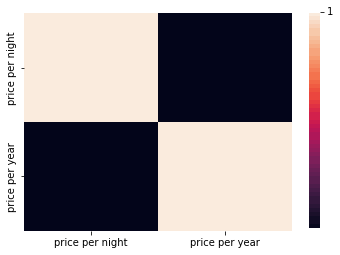

In [6]:
# data visualization and generating the matrix

sns.heatmap(mydata.corr())


In [7]:
#encoding the data by categories and turning all the characters into numbers so the model can use it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
print(ct.fit_transform(x)) # Notice the output is a string


[[0.0 0.0 0.0 ... 0.0 0.0 149]
 [0.0 0.0 0.0 ... 0.0 0.0 225]
 [0.0 0.0 0.0 ... 0.0 0.0 150]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 115]
 [0.0 0.0 0.0 ... 0.0 0.0 55]
 [0.0 0.0 0.0 ... 0.0 0.0 90]]


In [10]:
# setting up the training values to be used
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)



In [11]:
# import inear regression and put in the model to be trained
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [12]:
# using the regression to make predictions on the data
y_pred=regressor.predict(x_test)
print(y_pred)



[ 82125. 236885. 109500. ...  54750.  54385.  61685.]


In [13]:
print(regressor.coef_)

[-1.73258517e-14  3.65000000e+02]


In [14]:
print(regressor.intercept_)


-2.1827872842550278e-11


In [15]:
#gets the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


1.0